In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
import os
import geopandas as gpd
from shapely.geometry import Point


In [51]:

def load_storm_data():
    folder_path = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Data/Storm Data 1985-2024"  
    pattern = os.path.join(folder_path, "StormDetail_*.csv")  
    
    csv_files = glob.glob(pattern)  # Returns a list of all matching CSV file paths
    
    dataframes = []
    for file_path in csv_files:
        df = pd.read_csv(file_path)
        dataframes.append(df)
    
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()

storm_df = load_storm_data()
storm_df


/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/4057380275.py:9: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/4057380275.py:9: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/4057380275.py:9: DtypeWarning: Columns (26,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/4057380275.py:9: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/4057380275.py:9: DtypeWarning: Columns (28) have mixed types. Specify dtype op

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201007,7,1251,201007,7,1630,43850.0,254780,NEW HAMPSHIRE,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge built into Southern New England...,Heat index values at the Nashua Boire Field (K...,CSV
1,201001,17,2300,201001,18,1500,36500.0,211550,NEW HAMPSHIRE,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A coastal storm passing southern New England j...,Four to eight inches fell across eastern Hills...,CSV
2,201010,1,830,201010,1,1000,44854.0,260014,NEW HAMPSHIRE,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Several waves of low pressure moved across Sou...,"In Manchester, firefighters responded to about...",CSV
3,201007,6,951,201007,6,1830,43850.0,254779,NEW HAMPSHIRE,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge built into Southern New England...,Heat index values at the Manchester Airport (K...,CSV
4,201012,26,1700,201012,27,1800,46989.0,273769,NEW HAMPSHIRE,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strengthening winter storm passed southeast ...,Snowfall totals of 6 to 10 inches were observe...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826386,202112,11,532,202112,11,532,163794.0,993981,ALABAMA,1.0,...,1.0,WNW,PETERSVILLE,34.8596,-87.7011,34.8596,-87.7011,A quasi-linear convective system (QLCS) moved ...,A tree was knocked down onto a residence at 45...,CSV
1826387,202112,11,532,202112,11,532,163794.0,993982,ALABAMA,1.0,...,1.0,NW,ST FLORIAN,34.8751,-87.6263,34.8751,-87.6263,A quasi-linear convective system (QLCS) moved ...,Trees were knocked down on CR 30 at the Cathol...,CSV
1826388,202112,11,533,202112,11,533,163794.0,993986,ALABAMA,1.0,...,3.0,ENE,ST FLORIAN,34.8900,-87.5800,34.8900,-87.5800,A quasi-linear convective system (QLCS) moved ...,Trees and power lines were knocked down at the...,CSV
1826389,202112,11,534,202112,11,534,163794.0,993987,ALABAMA,1.0,...,4.0,WSW,COLBERT HGTS,34.6438,-87.7650,34.6438,-87.7650,A quasi-linear convective system (QLCS) moved ...,A tree was knocked down on Frankfurt Road.,CSV


In [52]:
def load_selected_storm_data(folder_path, years=[2000, 2001, 2002, 2003, 2004, 2005,2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]):
    dataframes = []
    for year in years:
        file_path = os.path.join(folder_path, f"StormDetail_{year}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)
        else:
            print(f"File for year {year} does not exist.")
    
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()

# Usage
folder_path = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Data/Storm Data 1985-2024"
selected_storm_df = load_selected_storm_data(folder_path)

selected_storm_df

/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/2733435808.py:6: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200012,31,600,200012,31,900,1104812,5165377,FLORIDA,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temperatures fell into the mid-20s over Glades...,NaN,PDC
1,200012,31,600,200012,31,900,1104812,5165378,FLORIDA,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temperatures fell into the mid-20s over Glades...,NaN,PDC
2,200012,31,700,200012,31,800,1104812,5165379,FLORIDA,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temperatures fell into the mid-20s over Glades...,NaN,PDC
3,200012,13,2200,200012,14,400,1105342,5165449,WEST VIRGINIA,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A mix of sleet, freezing rain and snow spread ...",NaN,PDC
4,200008,3,1410,200008,3,1410,1101140,5172568,MISSISSIPPI,28.0,...,NaN,NaN,FORKVILLE,32.45,-89.65,32.45,-89.65,NaN,Several trees were blown down along and onto h...,PDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450664,202308,26,1000,202308,30,2000,196268,1218142,ARIZONA,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong upper level ridge of high pressure ov...,NaN,CSV
1450665,202308,3,0,202308,3,2359,195981,1212646,ARIZONA,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge of high pressure over the South...,Two direct fatalities were reported by the Mar...,CSV
1450666,202308,3,0,202308,3,2359,195981,1212647,ARIZONA,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge of high pressure over the South...,One direct fatality was reported by the Marico...,CSV
1450667,202307,25,900,202307,28,1900,196902,1218031,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A persistent strong ridge of high pressure ove...,NaN,CSV


In [53]:
def load_location_data():
    folder_path = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Data/Location 1985-2024"  
    pattern = os.path.join(folder_path, "Location_*.csv")  
    
    csv_files = glob.glob(pattern)  # Returns a list of all matching CSV file paths
    
    dataframes = []
    for file_path in csv_files:
        df = pd.read_csv(file_path)
        dataframes.append(df)
    
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()

location_df = load_location_data()
location_df

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201104,48862,285976,1,0.57,E,GILLHAM,34.1700,-94.3100,3410200.0,9418600.0
1,201104,48862,285978,1,2.39,ESE,CENTER PT,34.0200,-93.8900,341200.0,9353400.0
2,201104,48862,285979,1,0.00,N,DE QUEEN,34.0300,-94.3300,341800.0,9419800.0
3,201104,48862,285980,1,0.90,NW,DE QUEEN,34.0400,-94.3400,342400.0,9420400.0
4,201104,48862,285981,1,0.57,E,DIAN,33.8000,-93.3900,3348000.0,9323400.0
...,...,...,...,...,...,...,...,...,...,...,...
1666752,200806,18887,752432,1,4.15,SE,NOCATEE,27.1160,-81.8340,276960.0,8150040.0
1666753,200806,16372,94596,1,1.85,SE,CAPE CORAL,26.5800,-81.9500,2634800.0,8157000.0
1666754,200806,18495,108220,1,5.00,SW,BROOKSVILLE,28.4988,-82.4382,2829928.0,8226292.0
1666755,200806,18725,109936,1,1.73,ENE,OLD TAMPA BAY,27.8583,-82.5533,2751498.0,8233198.0


In [54]:
def load_selected_location_data(folder_path, years=[2000, 2001, 2002, 2003, 2004, 2005,2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]):
    dataframes = []
    for year in years:
        file_path = os.path.join(folder_path, f"Location_{year}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)
        else:
            print(f"File for year {year} does not exist.")
    
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()

# Usage
folder_path = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Data/Location 1985-2024"
selected_location_df = load_selected_location_data(folder_path)

selected_location_df

File for year 2016 does not exist.


,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,200001,2414773,5127750,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001,2414773,5127751,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001,2414773,5127752,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200001,1090072,5127392,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001,1090073,5127393,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1431993,202306,180328,1100982,1,1.00,NW,WESTPORT,39.1902,-85.5932,3911412.0,8535592.0
1431994,202306,180352,1098599,1,3.34,SE,GOTTVILLE,41.8386,-122.6806,4150316.0,12240836.0
1431995,202306,180352,1098599,2,5.48,WNW,YREKA,41.7673,-122.7239,4146038.0,12243434.0
1431996,202306,180352,1098599,3,1.58,WNW,HAWKINSVILLE,41.7554,-122.6497,4145324.0,12238982.0


In [55]:
selected_storm_df = selected_storm_df[["YEAR", "EVENT_ID", "CZ_NAME", "STATE","EVENT_TYPE", "BEGIN_DATE_TIME", "END_DATE_TIME"]]
selected_storm_df = selected_storm_df[
    ((selected_storm_df["EVENT_TYPE"] == "Flood") | 
     (selected_storm_df["EVENT_TYPE"] == "Flash Flood") | 
     (selected_storm_df["EVENT_TYPE"] == "Coastal Flood")) &
    (selected_storm_df["STATE"] == "GEORGIA")
]
selected_storm_df

,YEAR,EVENT_ID,CZ_NAME,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME
5453,2000,5135328,BEN HILL,GEORGIA,Flash Flood,30-MAR-00 07:00:00,30-MAR-00 11:15:00
5731,2000,5135327,IRWIN,GEORGIA,Flash Flood,30-MAR-00 07:00:00,30-MAR-00 11:15:00
5855,2000,5133313,CRISP,GEORGIA,Flash Flood,30-MAR-00 10:30:00,30-MAR-00 10:30:00
5856,2000,5133314,DOOLY,GEORGIA,Flash Flood,30-MAR-00 10:30:00,30-MAR-00 10:30:00
5857,2000,5133315,WILCOX,GEORGIA,Flash Flood,30-MAR-00 10:30:00,30-MAR-00 10:30:00
...,...,...,...,...,...,...,...
1446322,2023,1141640,FULTON,GEORGIA,Flash Flood,14-SEP-23 13:00:00,14-SEP-23 16:00:00
1446415,2023,1141653,GLASCOCK,GEORGIA,Flash Flood,15-SEP-23 09:15:00,15-SEP-23 11:00:00
1446703,2023,1141647,FULTON,GEORGIA,Flash Flood,14-SEP-23 13:00:00,14-SEP-23 16:00:00
1446704,2023,1141650,FULTON,GEORGIA,Flash Flood,14-SEP-23 13:00:00,14-SEP-23 16:00:00


In [56]:
selected_storm_df["BEGIN_DATE_TIME"] = pd.to_datetime(selected_storm_df["BEGIN_DATE_TIME"], errors="coerce")
selected_storm_df["END_DATE_TIME"] = pd.to_datetime(selected_storm_df["END_DATE_TIME"], errors="coerce")

selected_storm_df["event_duration_minutes"] = (selected_storm_df["END_DATE_TIME"] - selected_storm_df["BEGIN_DATE_TIME"]) / pd.Timedelta(minutes=1)

selected_storm_df

/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/3399841311.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  selected_storm_df["BEGIN_DATE_TIME"] = pd.to_datetime(selected_storm_df["BEGIN_DATE_TIME"], errors="coerce")
/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_927/3399841311.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  selected_storm_df["END_DATE_TIME"] = pd.to_datetime(selected_storm_df["END_DATE_TIME"], errors="coerce")


,YEAR,EVENT_ID,CZ_NAME,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,event_duration_minutes
5453,2000,5135328,BEN HILL,GEORGIA,Flash Flood,2000-03-30 07:00:00,2000-03-30 11:15:00,255.0
5731,2000,5135327,IRWIN,GEORGIA,Flash Flood,2000-03-30 07:00:00,2000-03-30 11:15:00,255.0
5855,2000,5133313,CRISP,GEORGIA,Flash Flood,2000-03-30 10:30:00,2000-03-30 10:30:00,0.0
5856,2000,5133314,DOOLY,GEORGIA,Flash Flood,2000-03-30 10:30:00,2000-03-30 10:30:00,0.0
5857,2000,5133315,WILCOX,GEORGIA,Flash Flood,2000-03-30 10:30:00,2000-03-30 10:30:00,0.0
...,...,...,...,...,...,...,...,...
1446322,2023,1141640,FULTON,GEORGIA,Flash Flood,2023-09-14 13:00:00,2023-09-14 16:00:00,180.0
1446415,2023,1141653,GLASCOCK,GEORGIA,Flash Flood,2023-09-15 09:15:00,2023-09-15 11:00:00,105.0
1446703,2023,1141647,FULTON,GEORGIA,Flash Flood,2023-09-14 13:00:00,2023-09-14 16:00:00,180.0
1446704,2023,1141650,FULTON,GEORGIA,Flash Flood,2023-09-14 13:00:00,2023-09-14 16:00:00,180.0


In [9]:
selected_storm_df.to_csv("/Users/paranxiaair/Downloads/selected_storm_df.csv", index=False)

<font size = '6'>

Merge Location and Storm

In [10]:
selected_storm_df["EVENT_ID"] = pd.to_numeric(selected_storm_df["EVENT_ID"], errors="coerce")
selected_location_df["EVENT_ID"] = pd.to_numeric(selected_location_df["EVENT_ID"], errors="coerce")

storm_location = pd.merge(selected_storm_df, selected_location_df, on = 'EVENT_ID', how = 'inner')
storm_location


,YEAR,EVENT_ID,CZ_NAME,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,event_duration_minutes,YEARMONTH,EPISODE_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,2000,5135328,BEN HILL,GEORGIA,Flash Flood,2000-03-30 07:00:00,2000-03-30 11:15:00,255.0,200003,1092119,1,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN
1,2000,5135327,IRWIN,GEORGIA,Flash Flood,2000-03-30 07:00:00,2000-03-30 11:15:00,255.0,200003,1092119,1,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN
2,2000,5133313,CRISP,GEORGIA,Flash Flood,2000-03-30 10:30:00,2000-03-30 10:30:00,0.0,200003,1091208,1,NaN,NaN,CORDELE,NaN,NaN,NaN,NaN
3,2000,5133314,DOOLY,GEORGIA,Flash Flood,2000-03-30 10:30:00,2000-03-30 10:30:00,0.0,200003,1091208,1,NaN,NaN,BYROMVILLE,NaN,NaN,NaN,NaN
4,2000,5133315,WILCOX,GEORGIA,Flash Flood,2000-03-30 10:30:00,2000-03-30 10:30:00,0.0,200003,1091208,1,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,2023,1141650,FULTON,GEORGIA,Flash Flood,2023-09-14 13:00:00,2023-09-14 16:00:00,180.0,200610,185992,1,0.90,SE,ATLANTA,33.7600,-84.3900,3345600.0,8423400.0
8535,2023,1098075,CLINCH,GEORGIA,Flood,2023-05-12 18:30:00,2023-05-12 18:30:00,0.0,200610,180231,1,0.67,NNE,HOMERVILLE,31.0392,-82.7463,312352.0,8244778.0
8536,2023,1098075,CLINCH,GEORGIA,Flood,2023-05-12 18:30:00,2023-05-12 18:30:00,0.0,200610,180231,2,0.69,N,HOMERVILLE,31.0400,-82.7500,312400.0,8245000.0
8537,2023,1098075,CLINCH,GEORGIA,Flood,2023-05-12 18:30:00,2023-05-12 18:30:00,0.0,200610,180231,3,0.17,NE,HOMERVILLE,31.0320,-82.7483,311920.0,8244898.0


In [11]:
storm_location =  storm_location[["YEAR", "EVENT_ID", "CZ_NAME", "EVENT_TYPE", "LATITUDE", "LONGITUDE"]].dropna()
storm_location

,YEAR,EVENT_ID,CZ_NAME,EVENT_TYPE,LATITUDE,LONGITUDE
71,2001,5256617,FULTON,Flood,32.88333,-83.33333
72,2001,5256617,FULTON,Flood,32.83333,-83.08333
85,2001,5255347,SPALDING,Flood,33.43333,-84.73333
86,2001,5255347,SPALDING,Flood,33.33333,-84.65000
87,2001,5255348,FLOYD,Flood,34.11667,-83.56667
...,...,...,...,...,...,...
8534,2023,1141650,FULTON,Flash Flood,33.76000,-84.39000
8535,2023,1098075,CLINCH,Flood,31.03920,-82.74630
8536,2023,1098075,CLINCH,Flood,31.04000,-82.75000
8537,2023,1098075,CLINCH,Flood,31.03200,-82.74830


In [12]:
storm_location_past = storm_location[ storm_location["YEAR"].isin([2005, 2006, 2007, 2008, 2009, 2010]) ]
storm_location_past

,YEAR,EVENT_ID,CZ_NAME,EVENT_TYPE,LATITUDE,LONGITUDE
595,2005,5440311,DOOLY,Flash Flood,32.31667,-83.41667
596,2005,5440311,DOOLY,Flash Flood,32.31667,-83.40000
597,2005,5440018,UPSON,Flood,31.55000,-82.85000
598,2005,5440217,UPSON,Flood,31.55000,-82.85000
602,2005,5440221,TALBOT,Flood,32.73333,-83.98333
...,...,...,...,...,...,...
2497,2010,260392,HOUSTON,Flood,32.47250,-83.74520
2498,2010,203080,MCDUFFIE,Flash Flood,33.44720,-82.47490
2499,2010,203080,MCDUFFIE,Flash Flood,33.44180,-82.51870
2500,2010,203080,MCDUFFIE,Flash Flood,33.48720,-82.53190


In [13]:
storm_location_past_out = storm_location_past [["YEAR", "EVENT_ID", "LATITUDE", "LONGITUDE"]]

In [14]:
storm_location_past_out.to_csv("/Users/paranxiaair/Downloads/storm_location_past_out.csv", index=False)

In [15]:
storm_location_present = storm_location[ storm_location["YEAR"].isin([2018.2019,2020,2021,2022,2023]) ]
storm_location_present

,YEAR,EVENT_ID,CZ_NAME,EVENT_TYPE,LATITUDE,LONGITUDE
4973,2020,881747,FORSYTH,Flash Flood,34.2400,-84.2300
4974,2020,881747,FORSYTH,Flash Flood,34.2530,-84.2365
4975,2020,881747,FORSYTH,Flash Flood,34.2560,-84.2231
4976,2020,881747,FORSYTH,Flash Flood,34.2519,-84.2098
4977,2020,881747,FORSYTH,Flash Flood,34.2462,-84.2032
...,...,...,...,...,...,...
8534,2023,1141650,FULTON,Flash Flood,33.7600,-84.3900
8535,2023,1098075,CLINCH,Flood,31.0392,-82.7463
8536,2023,1098075,CLINCH,Flood,31.0400,-82.7500
8537,2023,1098075,CLINCH,Flood,31.0320,-82.7483


In [16]:
storm_location_present_out = storm_location_present [["YEAR", "EVENT_ID", "LATITUDE", "LONGITUDE"]]

In [17]:
storm_location_present_out.to_csv("/Users/paranxiaair/Downloads/storm_location_present_out.csv", index=False)

In [18]:
def csvs_to_geojson(selected_files, folder_path, lon_col='LONGITUDE', lat_col='LATITUDE'):
    for csv_file in selected_files:
        # Build the complete file path
        csv_path = os.path.join(folder_path, csv_file)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
        
        # Create a geometry column using the longitude and latitude (order: [longitude, latitude])
        df["geometry"] = df.apply(lambda row: Point(row[lon_col], row[lat_col]), axis=1)
        
        # Convert the DataFrame into a GeoDataFrame and set its CRS (EPSG:4326 is standard for GeoJSON)
        gdf = gpd.GeoDataFrame(df, geometry="geometry")
        gdf.set_crs(epsg=4326, inplace=True)
        
        # Construct the output GeoJSON file path by replacing .csv with .geojson
        base_name = os.path.splitext(csv_file)[0]
        geojson_file = os.path.join(folder_path, base_name + ".geojson")
        
        # Save the GeoDataFrame to a GeoJSON file
        gdf.to_file(geojson_file, driver="GeoJSON")
        print(f"Converted {csv_path} to {geojson_file}")

# Folder where the CSV files are located
folder_path = "/Users/paranxiaair/Downloads/"

# List only the two CSV files that need to be converted
selected_files = [
    "storm_location_past_out.csv",
    "storm_location_present_out.csv"
]

# Convert the selected CSV files to GeoJSON files
csvs_to_geojson(selected_files, folder_path, lon_col='LONGITUDE', lat_col='LATITUDE')

Converted /Users/paranxiaair/Downloads/storm_location_past_out.csv to /Users/paranxiaair/Downloads/storm_location_past_out.geojson
Converted /Users/paranxiaair/Downloads/storm_location_present_out.csv to /Users/paranxiaair/Downloads/storm_location_present_out.geojson


<font size = '6'>

**Sum of Time and RoC**

In [19]:
selected_storm_df["BEGIN_DATE_TIME"] = pd.to_datetime(selected_storm_df["BEGIN_DATE_TIME"], errors="coerce")
selected_storm_df["END_DATE_TIME"] = pd.to_datetime(selected_storm_df["END_DATE_TIME"], errors="coerce")

selected_storm_df["event_duration_minutes"] = (selected_storm_df["END_DATE_TIME"] - selected_storm_df["BEGIN_DATE_TIME"]) / pd.Timedelta(minutes=1)

time_per_county = (
    selected_storm_df.groupby(["YEAR", "CZ_NAME"], as_index=False)["event_duration_minutes"]
    .sum()
)

# Replace a total of 0 minutes with 1 minute for each group
time_per_county["total_flood_minutes"] = time_per_county["event_duration_minutes"].apply(lambda x: 5 if x == 0 else x)

time_per_county.drop(columns=["event_duration_minutes"], inplace=True)

time_per_county

,YEAR,CZ_NAME,total_flood_minutes
0,2000,BALDWIN,5.0
1,2000,BARTOW,30.0
2,2000,BEN HILL,255.0
3,2000,BERRIEN,255.0
4,2000,BIBB,5.0
...,...,...,...
1198,2023,UPSON,2480.0
1199,2023,WALTON,540.0
1200,2023,WAYNE,5.0
1201,2023,WILKINSON,60.0


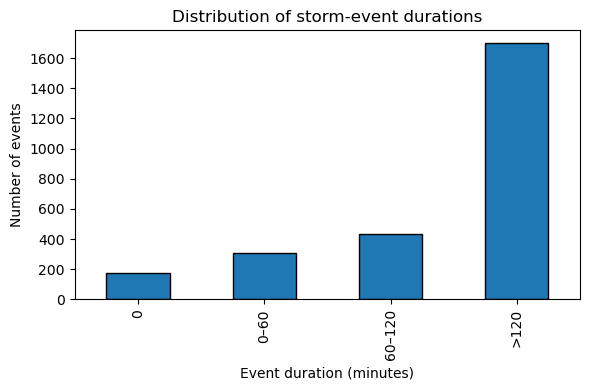

In [34]:

# 1) grab your per‐event duration series
#    this assumes you already have a column of float minutes:
dur = selected_storm_df['event_duration_minutes']

# 2) define bins and labels
bins   = [-np.inf, 0,  60, 120,    np.inf]
labels = [    '0', '0–60','60–120', '>120']

# 3) cut into categories
dur_cat = pd.cut(dur, bins=bins, labels=labels, right=True)

# 4) count occurrences in each bin, in the correct order
counts = dur_cat.value_counts().reindex(labels)

# 5) plot as a “histogram” (bar chart over categories)
plt.figure(figsize=(6,4))
counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Event duration (minutes)')
plt.ylabel('Number of events')
plt.title('Distribution of storm‐event durations')
plt.tight_layout()
plt.show()


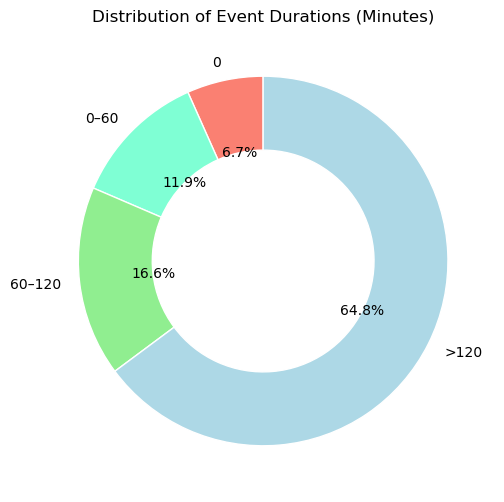

In [49]:
dur  = selected_storm_df['event_duration_minutes']

# 2) define bins & labels
bins   = [-np.inf, 0,  60, 120, np.inf]
labels = ['0', '0–60', '60–120', '>120']

# 3) bucket and count
dur_cat = pd.cut(dur, bins=bins, labels=labels, right=True)
counts  = dur_cat.value_counts().reindex(labels)

# 4) draw a donut
colors = ['salmon', 'aquamarine', 'lightgreen', 'lightblue']
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width':0.4, 'edgecolor':'white'},
    colors = colors,
)
ax.set(aspect="equal", title='Distribution of Event Durations (Minutes)')
plt.show()


In [20]:
yearly_time = time_per_county.groupby("YEAR", as_index=False)["total_flood_minutes"].sum()
yearly_time


,YEAR,total_flood_minutes
0,2000,4271.0
1,2001,6262.0
2,2002,5403.0
3,2003,43777.0
4,2004,49961.0
5,2005,122651.0
6,2006,4612.0
7,2007,3270.0
8,2008,20558.0
9,2009,247690.0


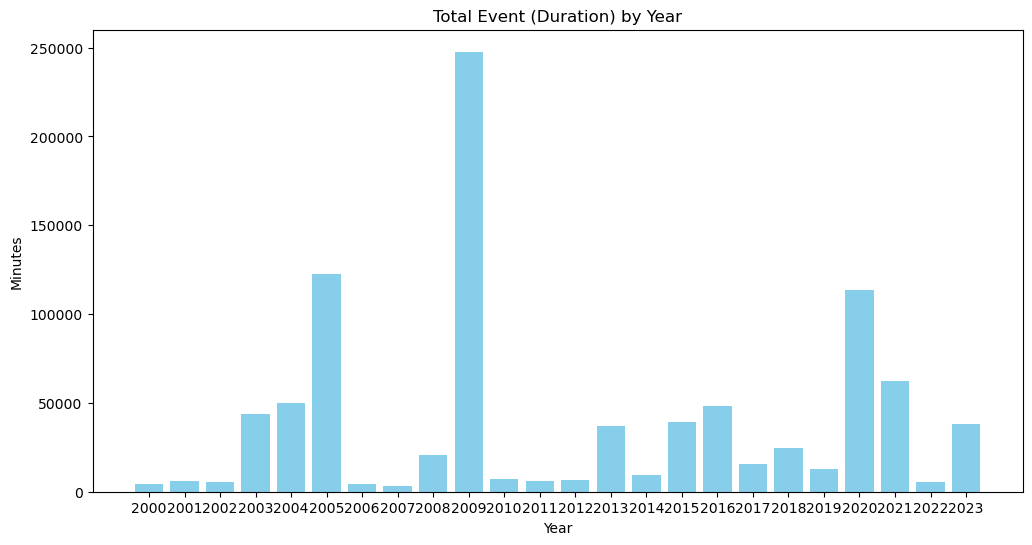

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_time["YEAR"], yearly_time["total_flood_minutes"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Minutes")
plt.title("Total Event (Duration) by Year")
plt.xticks(yearly_time["YEAR"])  
plt.show()

In [57]:
def compare_two_time_spans(time_per_county):
    group1 = time_per_county[
        time_per_county["YEAR"].between(2005, 2010)
    ].groupby("CZ_NAME", as_index=False)["total_flood_minutes"].sum()
    group1.rename(columns={"total_flood_minutes": "total_flood_minutes_2000_2005"}, inplace=True)
    
    group2 = time_per_county[
        time_per_county["YEAR"].between(2018, 2023)
    ].groupby("CZ_NAME", as_index=False)["total_flood_minutes"].sum()
    group2.rename(columns={"total_flood_minutes": "total_flood_minutes_2018_2023"}, inplace=True)
    
    merged_counts = pd.merge(group1, group2, on="CZ_NAME", how="outer")
    
    # Fill missing counts with 0 if a CZ_NAME exists in one group but not the other.
    merged_counts["total_flood_minutes_2000_2005"] = merged_counts["total_flood_minutes_2000_2005"].fillna(0)
    merged_counts["total_flood_minutes_2018_2023"] = merged_counts["total_flood_minutes_2018_2023"].fillna(0)
    
    # Calculate rate of change as a percentage.
    merged_counts["rate_change_percent"] = np.where(
        merged_counts["total_flood_minutes_2000_2005"] == 0,
        np.nan,
        ((merged_counts["total_flood_minutes_2018_2023"] - merged_counts["total_flood_minutes_2000_2005"]) 
         / merged_counts["total_flood_minutes_2000_2005"]) * 100
    )
    
    return merged_counts

final_result_time = compare_two_time_spans(time_per_county)
final_result_time


,CZ_NAME,total_flood_minutes_2000_2005,total_flood_minutes_2018_2023,rate_change_percent
0,ATKINSON,1100.0,245.0,-77.727273
1,BAKER,7860.0,360.0,-95.419847
2,BALDWIN,1501.0,1037.0,-30.912725
3,BANKS,910.0,808.0,-11.208791
4,BARROW,1116.0,313.0,-71.953405
...,...,...,...,...
160,JASPER,0.0,663.0,NaN
161,JEFF DAVIS,0.0,10.0,NaN
162,LANIER,0.0,150.0,NaN
163,LINCOLN,0.0,210.0,NaN


In [60]:
final_result_time.to_csv("/Users/paranxiaair/Downloads/RoC_SumTime_Storm0510.csv", index=False)

<font size = '6'>

**Event counts and RoC**

In [ ]:
event_counts = selected_storm_df.groupby(["YEAR", "CZ_NAME"], as_index=False)["EVENT_ID"].count()
event_counts.rename(columns={"EVENT_ID": "event_count"}, inplace=True)

event_counts


,YEAR,CZ_NAME,event_count
0,2000,BALDWIN,1
1,2000,BARTOW,1
2,2000,BEN HILL,1
3,2000,BERRIEN,1
4,2000,BIBB,2
...,...,...,...
1198,2023,UPSON,7
1199,2023,WALTON,3
1200,2023,WAYNE,1
1201,2023,WILKINSON,1


In [83]:
mask1 = event_counts['YEAR'].between(2005, 2010)
sum_2005_2010 = (
    event_counts[mask1]
    .groupby('CZ_NAME', as_index=False)['event_count']
    .sum()
    .rename(columns={'event_count':'sum_2005_2010'})
)

# 2) sum over 2018–2023
mask2 = event_counts['YEAR'].between(2018, 2023)
sum_2018_2023 = (
    event_counts[mask2]
    .groupby('CZ_NAME', as_index=False)['event_count']
    .sum()
    .rename(columns={'event_count':'sum_2018_2023'})
)

# 3) merge them into one summary table
event_count_comparison_summary = pd.merge(sum_2005_2010,
                   sum_2018_2023,
                   on='CZ_NAME',
                   how='outer'
                  ).fillna(0)

event_count_comparison_summary

,CZ_NAME,sum_2005_2010,sum_2018_2023
0,ATKINSON,2.0,2.0
1,BAKER,4.0,1.0
2,BALDWIN,2.0,4.0
3,BANKS,5.0,4.0
4,BARROW,5.0,1.0
...,...,...,...
160,JASPER,0.0,3.0
161,JEFF DAVIS,0.0,2.0
162,LANIER,0.0,1.0
163,LINCOLN,0.0,4.0


### Nonnormalized

### Normalized

In [84]:
# compute rate of change
num = event_count_comparison_summary['sum_2018_2023'] - event_count_comparison_summary['sum_2005_2010']
den = event_count_comparison_summary['sum_2018_2023'] + event_count_comparison_summary['sum_2005_2010']

event_count_comparison_summary['rate_of_change'] = num.div(den).fillna(0)
event_count_comparison_summary['rate_of_change (%)'] = num.div(den).fillna(0).mul(100)
event_count_comparison_summary


,CZ_NAME,sum_2005_2010,sum_2018_2023,rate_of_change,rate_of_change (%)
0,ATKINSON,2.0,2.0,0.000000,0.000000
1,BAKER,4.0,1.0,-0.600000,-60.000000
2,BALDWIN,2.0,4.0,0.333333,33.333333
3,BANKS,5.0,4.0,-0.111111,-11.111111
4,BARROW,5.0,1.0,-0.666667,-66.666667
...,...,...,...,...,...
160,JASPER,0.0,3.0,1.000000,100.000000
161,JEFF DAVIS,0.0,2.0,1.000000,100.000000
162,LANIER,0.0,1.0,1.000000,100.000000
163,LINCOLN,0.0,4.0,1.000000,100.000000


In [85]:
event_count_comparison_summary.to_csv("/Users/paranxiaair/Downloads/0523_Normalized_event_count_comparison_RoC.csv", index=False)

In [87]:
annual_count = event_counts.groupby('YEAR')['event_count'].sum().reset_index()
annual_count.columns = ['YEAR', 'TOTAL_EVENTS']
annual_count

,YEAR,TOTAL_EVENTS
0,2000,46
1,2001,65
2,2002,74
3,2003,239
4,2004,151
5,2005,211
6,2006,30
7,2007,30
8,2008,46
9,2009,285


In [88]:
annual_count['blk'] = (annual_count['YEAR'] - 2005) // 5

annual_count['period'] = annual_count['blk'].map(
    lambda b: f"{2005 + 5*b}-{2005 + 5*b + 4}"
)

five_year_df = (
    annual_count
      .groupby('period', as_index=False)['TOTAL_EVENTS']
      .sum()
      .rename(columns={'TOTAL_EVENTS':'FIVE_YEAR_TOTAL'})
)

five_year_df

,period,FIVE_YEAR_TOTAL
0,2000-2004,575
1,2005-2009,602
2,2010-2014,312
3,2015-2019,379
4,2020-2024,753


In [99]:
# 1) keep only years 2005–2024
df = annual_count[annual_count['YEAR'].between(2006, 2024)].copy()

# 2) compute 4-year block starting at 2005
df['blk'] = (df['YEAR'] - 2006) // 4

# 3) map each block to a "YYYY-YYYY" label, capping the last block at 2024
def make_period(b):
    start = 2006 + 4*b
    end   = min(start + 3, 2024)
    return f"{start}-{end}"

df['period'] = df['blk'].apply(make_period)

# 4) group and sum
five_year_df = (
    df
    .groupby('period', as_index=False)['TOTAL_EVENTS']
    .sum()
    .rename(columns={'TOTAL_EVENTS': 'FIVE_YEAR_TOTAL'})
)

five_year_df



,period,FIVE_YEAR_TOTAL
0,2006-2009,391
1,2010-2013,266
2,2014-2017,261
3,2018-2021,691
4,2022-2024,226


In [110]:
# 1) keep only years 2005–2024
df = annual_count[annual_count['YEAR'].between(2005, 2024)].copy()

# 2) compute 4-year block starting at 2005
df['blk'] = (df['YEAR'] - 2005) // 4

# 3) map each block to a "YYYY-YYYY" label, capping the last block at 2024
def make_period(b):
    start = 2005 + 4*b
    end   = min(start + 3, 2024)
    return f"{start}-{end}"

df['period'] = df['blk'].apply(make_period)

# 4) group and sum
five_year_df = (
    df
    .groupby('period', as_index=False)['TOTAL_EVENTS']
    .sum()
    .rename(columns={'TOTAL_EVENTS': 'FIVE_YEAR_TOTAL'})
)

five_year_df


,period,FIVE_YEAR_TOTAL
0,2005-2008,317
1,2009-2012,399
2,2013-2016,358
3,2017-2020,532
4,2021-2024,440


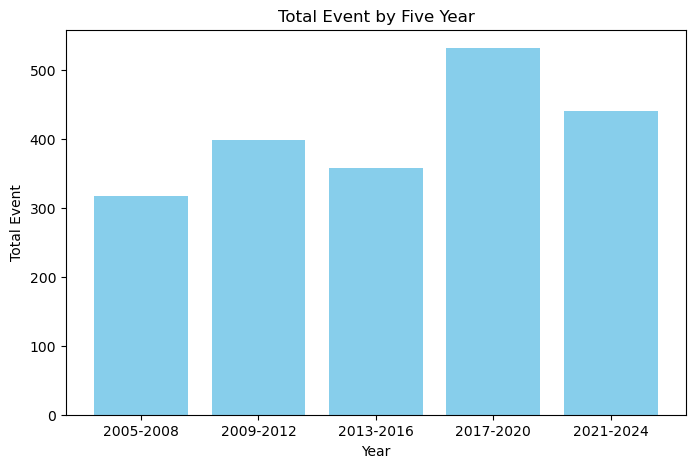

In [111]:
plt.figure(figsize=(8, 5))
plt.bar(five_year_df["period"], five_year_df["FIVE_YEAR_TOTAL"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Total Event")
plt.title("Total Event by Five Year")
plt.xticks(five_year_df["period"])  
plt.show()

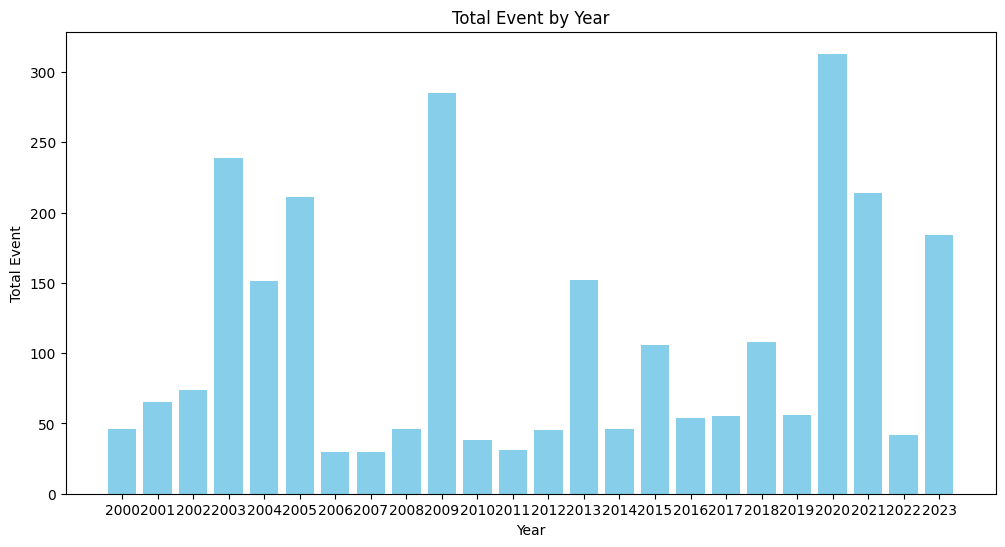

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(annual_count["YEAR"], annual_count["TOTAL_EVENTS"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Total Event")
plt.title("Total Event by Year")
plt.xticks(annual_count["YEAR"])  
plt.show()

In [ ]:
#count_2023 = event_counts[event_counts["year"] == 2023]
#count_2024 = event_counts[event_counts["year"] == 2024]

#merged_counts = pd.merge(count_2023, count_2024, on="CZ_NAME", suffixes=("_2023", "_2024"))

#merged_counts["rate_change_percent"] = ((merged_counts["event_count_2024"] - merged_counts["event_count_2023"]) /
                                         # merged_counts["event_count_2023"]) * 100



In [65]:
def compare_two_time_spans(event_counts):
  
    group1 = event_counts[
        event_counts["YEAR"].between(2000, 2005)
    ].groupby("CZ_NAME", as_index=False)["event_count"].sum()
    group1.rename(columns={"event_count": "event_count_2000_2005"}, inplace=True)
    

    group2 = event_counts[
        event_counts["YEAR"].between(2018, 2023)
    ].groupby("CZ_NAME", as_index=False)["event_count"].sum()
    group2.rename(columns={"event_count": "event_count_2018_2023"}, inplace=True)
    
    merged_counts = pd.merge(group1, group2, on="CZ_NAME", how="outer")
    
    # If a CZ_NAME exists in one group but not the other, fill missing counts with 0.
    merged_counts["event_count_2000_2005"] = merged_counts["event_count_2000_2005"].fillna(0)
    merged_counts["event_count_2018_2023"] = merged_counts["event_count_2018_2023"].fillna(0)
    
    # If the 2000-2005 count is 0, set it to NaN (avoid division by zero).
    merged_counts["rate_change_percent"] = np.where(
        merged_counts["event_count_2000_2005"] == 0,
        np.nan,
        ((merged_counts["event_count_2018_2023"] - merged_counts["event_count_2000_2005"]) 
          / merged_counts["event_count_2000_2005"]) * 100
    )
    
    return merged_counts

final_result_count = compare_two_time_spans(event_counts)
final_result_count


,CZ_NAME,event_count_2000_2005,event_count_2018_2023,rate_change_percent
0,APPLING,1.0,3.0,200.000000
1,ATKINSON,2.0,2.0,0.000000
2,BACON,3.0,0.0,-100.000000
3,BAKER,1.0,1.0,0.000000
4,BALDWIN,3.0,4.0,33.333333
...,...,...,...,...
159,LINCOLN,0.0,4.0,NaN
160,MITCHELL,0.0,8.0,NaN
161,TIFT,0.0,11.0,NaN
162,TURNER,0.0,26.0,NaN


In [66]:
final_result_count.to_csv("/Users/paranxiaair/Downloads/RoC0023_nonnormalized_per_county_Storm.csv", index=False)

<font size = '5'>

**Fatalities**

In [ ]:
def load_fatality_data(folder_path):
    """
    1) Loads all 'StormEvents_locations-ftp_v1.0_dXXXX_*.csv' files from 'folder_path'.
    2) Concatenates them into a single DataFrame.
    3) Renames each file from 'StormEvents_locations-ftp_v1.0_dYYYY_c...csv'
       to 'Location_YYYY.csv'.
    """

    # Construct the pattern to find files
    pattern = os.path.join(folder_path, "*.csv")
    csv_files = glob.glob(pattern)

    # Load them into a list of DataFrames
    dataframes = []
    for file_path in csv_files:
        location = pd.read_csv(file_path)
        dataframes.append(location)

    # Rename each file based on the 4-digit year in the pattern 'dYYYY'
    for file_path in csv_files:
        file_name = os.path.basename(file_path)
        match = re.search(r"_d(\d{4})_", file_name)
        if match:
            year = match.group(1)  # e.g., '2018'
            new_file_name = f"Fatality_{year}.csv"
            new_file_path = os.path.join(folder_path, new_file_name)
            
            # Rename on disk
            os.rename(file_path, new_file_path)
            print(f"Renamed '{file_name}' -> '{new_file_name}'")
        else:
            print(f"Could not find year in '{file_name}' (no rename done).")

    # Combine all DataFrames into one
    if dataframes:
        combined_location = pd.concat(dataframes, ignore_index=True)
        return combined_location
    else:
        return pd.DataFrame()


folder = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Data/Fatalities 2000-2023"
fatality_df = load_fatality_data(folder)
fatality_df

Could not find year in 'Fatality_2008.csv' (no rename done).
Could not find year in 'Fatality_2020.csv' (no rename done).
Could not find year in 'Fatality_2021.csv' (no rename done).
Could not find year in 'Fatality_2009.csv' (no rename done).
Could not find year in 'Fatality_2023.csv' (no rename done).
Could not find year in 'Fatality_2022.csv' (no rename done).
Could not find year in 'Fatality_2019.csv' (no rename done).
Could not find year in 'Fatality_2018.csv' (no rename done).
Could not find year in 'Fatality_2001.csv' (no rename done).
Could not find year in 'Fatality_2015.csv' (no rename done).
Could not find year in 'Fatality_2014.csv' (no rename done).
Could not find year in 'Fatality_2000.csv' (no rename done).
Could not find year in 'Fatality_2016.csv' (no rename done).
Could not find year in 'Fatality_2002.csv' (no rename done).
Could not find year in 'Fatality_2003.csv' (no rename done).
Could not find year in 'Fatality_2017.csv' (no rename done).
Could not find year in '

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,200801,20,0,2307,73357,D,01/20/2008 00:00:00,61.0,F,Permanent Home,999999.0
1,200801,2,0,2312,73424,I,01/02/2008 00:00:00,25.0,F,Vehicle/Towed Trailer,999999.0
2,200801,2,0,2313,73424,I,01/02/2008 00:00:00,26.0,F,Vehicle/Towed Trailer,999999.0
3,200801,7,0,2421,73744,D,01/07/2008 00:00:00,84.0,F,Permanent Home,999999.0
4,200801,7,0,2422,73745,D,01/07/2008 00:00:00,52.0,F,Mobile/Trailer Home,999999.0
...,...,...,...,...,...,...,...,...,...,...,...
19084,200508,28,1100,1008644,5475622,D,08/28/2005 11:00:00,53.0,M,Other,200508.0
19085,200508,28,1100,1008645,5475622,D,08/28/2005 11:00:00,15.0,F,Other,200508.0
19086,200508,28,1100,1008646,5475622,D,08/28/2005 11:00:00,53.0,F,Other,200508.0
19087,200508,28,1100,1008647,5475622,D,08/28/2005 11:00:00,37.0,F,Other,200508.0


In [23]:
def load_selected_fatality_data(folder_path, years=[2000, 2001, 2002, 2003, 2004, 2005,2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]):
    dataframes = []
    for year in years:
        file_path = os.path.join(folder_path, f"Fatality_{year}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)
        else:
            print(f"File for year {year} does not exist.")
    
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()


folder_path = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Data/Fatalities 2000-2023"
selected_fatality_df = load_selected_fatality_data(folder_path)

selected_fatality_df


,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,200009,5,0,1007045,5174317,D,09/05/2000 12:00:00,61.0,M,Permanent Home,200009.0
1,200009,10,0,1007047,5158936,D,09/10/2000 12:00:00,88.0,F,Permanent Home,200009.0
2,200009,3,0,1007048,5174425,D,09/03/2000 12:00:00,84.0,F,Long Span Roof,200009.0
3,200009,2,0,1007049,5158270,D,09/02/2000 12:00:00,66.0,F,Permanent Home,200009.0
4,200009,3,0,1007050,5158270,D,09/03/2000 12:00:00,77.0,F,Permanent Home,200009.0
...,...,...,...,...,...,...,...,...,...,...,...
19084,202308,15,0,55035,1214048,D,08/15/2023 00:00:00,NaN,NaN,Unknown,202308.0
19085,202308,18,0,54887,1214052,I,08/18/2023 00:00:00,NaN,NaN,Unknown,202308.0
19086,202308,27,0,54912,1214447,D,08/27/2023 00:00:00,NaN,NaN,Unknown,202308.0
19087,202308,29,0,54924,1214447,I,08/29/2023 00:00:00,NaN,NaN,Unknown,202308.0


In [ ]:
# DATA FOR NON FILTERED-FATALITIES
#selected_fatality_df['year'] = selected_fatality_df['FAT_YEARMONTH'].astype(str).str[:4]

#fatalities_per_year = selected_fatality_df.groupby('year').size().reset_index(name='fatality_count')
#fatalities_per_year


,year,fatality_count
0,2000,476
1,2001,465
2,2002,466
3,2003,443
4,2004,369
5,2005,1454
6,2006,656
7,2007,713
8,2008,827
9,2009,559


In [24]:
# Convert EVENT_ID to string and strip whitespace in both DataFrames
selected_fatality_df["EVENT_ID"] = selected_fatality_df["EVENT_ID"].astype(str).str.strip()
selected_storm_df["EVENT_ID"] = selected_storm_df["EVENT_ID"].astype(str).str.strip()


In [25]:
fatal_ids = set(selected_fatality_df["EVENT_ID"].unique())
storm_ids = set(selected_storm_df["EVENT_ID"].unique())

print("Unique EVENT_ID count in fatalities (all US):", len(fatal_ids))
print("Unique EVENT_ID count in storms (only Georgia):", len(storm_ids))

common_ids = fatal_ids.intersection(storm_ids)
print("Common EVENT_ID count:", len(common_ids))


Unique EVENT_ID count in fatalities (all US): 10735
Unique EVENT_ID count in storms (only Georgia): 2621
Common EVENT_ID count: 10


In [26]:
fatality_counts = selected_fatality_df['EVENT_ID'].value_counts()

fatality_count_df = fatality_counts.reset_index(name="fatality_count")

fatality_count_df.rename(columns={"index": "EVENT_ID"}, inplace=True)

fatality_count_df


,EVENT_ID,fatality_count
0,5475622,638
1,296617,161
2,1210858,150
3,5475620,140
4,1118193,100
...,...,...
10730,260674,1
10731,260955,1
10732,260962,1
10733,261086,1


In [27]:
mergeaa = pd.merge(selected_storm_df, fatality_count_df, on = "EVENT_ID", how = "inner")
mergeaa

,YEAR,EVENT_ID,CZ_NAME,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,fatality_count
0,2001,5238872,HARRIS,GEORGIA,Flash Flood,03-MAR-01 22:00:00,03-MAR-01 22:00:00,1
1,2003,5335029,NEWTON,GEORGIA,Flash Flood,22-JUL-03 08:45:00,22-JUL-03 10:30:00,1
2,2004,5424878,LUMPKIN,GEORGIA,Flash Flood,16-SEP-04 19:00:00,17-SEP-04 00:45:00,1
3,2008,155134,GRADY,GEORGIA,Flash Flood,23-AUG-08 13:00:00,23-AUG-08 23:00:00,1
4,2009,200712,GWINNETT,GEORGIA,Flash Flood,21-SEP-09 02:06:00,21-SEP-09 05:15:00,1
5,2009,200747,CHATTOOGA,GEORGIA,Flood,21-SEP-09 02:13:00,21-SEP-09 14:00:00,1
6,2009,200742,DOUGLAS,GEORGIA,Flood,21-SEP-09 02:00:00,21-SEP-09 19:45:00,1
7,2009,199514,CARROLL,GEORGIA,Flash Flood,21-SEP-09 00:30:00,22-SEP-09 01:00:00,1
8,2009,200265,DOUGLAS,GEORGIA,Flash Flood,20-SEP-09 21:30:00,21-SEP-09 02:00:00,6
9,2013,467730,FLOYD,GEORGIA,Flood,07-MAY-13 21:00:00,07-MAY-13 23:00:00,1


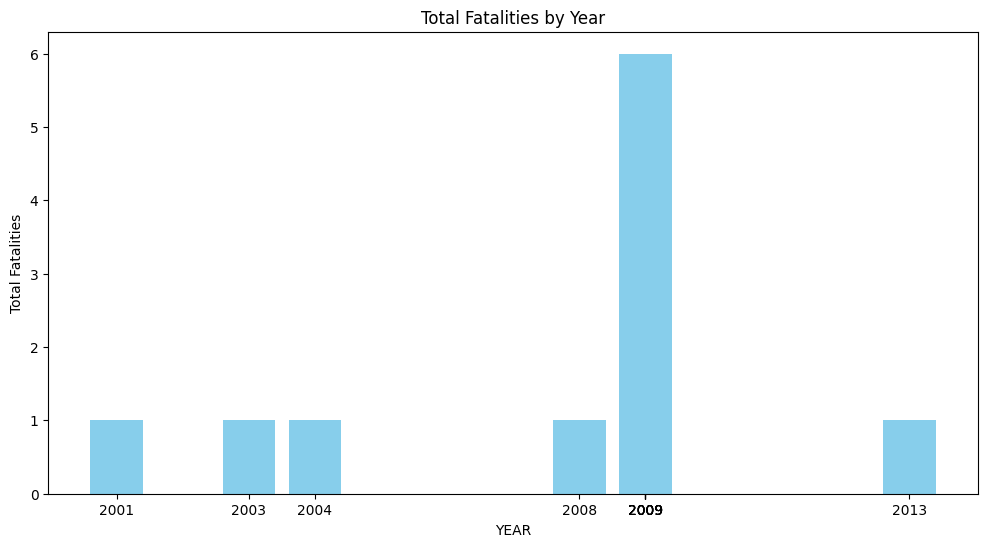

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(mergeaa["YEAR"], mergeaa["fatality_count"], color="skyblue")
plt.xlabel("YEAR")
plt.ylabel("Total Fatalities")
plt.title("Total Fatalities by Year")
plt.xticks(mergeaa["YEAR"])  
plt.show()


In [ ]:


 # def load_location_data(folder_path):
    """
    1) Loads all 'StormEvents_locations-ftp_v1.0_dXXXX_*.csv' files from 'folder_path'.
    2) Concatenates them into a single DataFrame.
    3) Renames each file from 'StormEvents_locations-ftp_v1.0_dYYYY_c...csv'
       to 'Location_YYYY.csv'.
    """

    # Construct the pattern to find files
    pattern = os.path.join(folder_path, "*.csv")
    csv_files = glob.glob(pattern)

    # Load them into a list of DataFrames
    dataframes = []
    for file_path in csv_files:
        location = pd.read_csv(file_path)
        dataframes.append(location)

    # Rename each file based on the 4-digit year in the pattern 'dYYYY'
    for file_path in csv_files:
        file_name = os.path.basename(file_path)
        match = re.search(r"_d(\d{4})_", file_name)
        if match:
            year = match.group(1)  # e.g., '2018'
            new_file_name = f"Location_{year}.csv"
            new_file_path = os.path.join(folder_path, new_file_name)
            
            # Rename on disk
            os.rename(file_path, new_file_path)
            print(f"Renamed '{file_name}' -> '{new_file_name}'")
        else:
            print(f"Could not find year in '{file_name}' (no rename done).")

    # Combine all DataFrames into one
    if dataframes:
        combined_location = pd.concat(dataframes, ignore_index=True)
        return combined_location
    else:
        return pd.DataFrame()


folder = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024"
location_df = load_location_data(folder)
print(location_df.head())

IndentationError: unexpected indent (3824008478.py, line 2)

In [ ]:
# def select_event_location_columns(df):
    """
    Given a DataFrame from your location files,
    this function returns a new DataFrame containing only the
    'EVENT_ID' and 'LOCATION' columns.
    
    If the columns are named differently (e.g., 'Location' instead of 'LOCATION'),
    update the column names accordingly.
    """
    # Select only the desired columns.
    # Adjust the names if your actual DataFrame has a different case/spelling.
    selected_df = df[['EVENT_ID', 'LOCATION']]
    
    return selected_df


selected_location_df = select_event_location_columns(location_df)
print(selected_location_df.head())


   EVENT_ID   LOCATION
0    285976    GILLHAM
1    285978  CENTER PT
2    285979   DE QUEEN
3    285980   DE QUEEN
4    285981       DIAN


In [ ]:
# def merge_storm_detail_location(storm_detail_folder, location_folder):
    """
    For each StormDetail_XXXX.csv file in storm_detail_folder, this function:
      1. Extracts the year (XXXX) from the filename.
      2. Looks for a corresponding Location_XXXX.csv file in location_folder.
      3. Loads both CSVs.
      4. Merges them on 'EVENT_ID'.
      5. Selects only the 'EVENT_ID' and 'location' columns.
    
    It returns a combined DataFrame with merged data for all years.
    """
    # Pattern for storm detail files: e.g., StormDetail_2000.csv, StormDetail_2001.csv, etc.
    storm_pattern = os.path.join(storm_detail_folder, "StormDetail_*.csv")
    storm_files = glob.glob(storm_pattern)
    
    merged_list = []
    
    for storm_file in storm_files:
        # Extract the 4-digit year from the filename
        base_name = os.path.basename(storm_file)
        match = re.search(r"StormDetail_(\d{4})\.csv", base_name)
        if match:
            year = match.group(1)
            # Construct the expected location file name for that year.
            location_file = os.path.join(location_folder, f"Location_{year}.csv")
            
            if os.path.exists(location_file):
                # Load the two dataframes.
                storm_df = pd.read_csv(storm_file)
                location_df = pd.read_csv(location_file)
                
                # Merge them on EVENT_ID.
                merged_df = pd.merge(storm_df, location_df, on='EVENT_ID', how='inner')
                
                # Select only the EVENT_ID and location columns.
                # (Assumes location_df already has the 'location' column; if not, 
                # you may need to rename the appropriate column first.)
                merged_df = merged_df[['STATE', 'LOCATION', 'EVENT_TYPE', 'EVENT_ID']]
                
                merged_list.append(merged_df)
            else:
                print(f"Location file for year {year} not found in {location_folder}.")
        else:
            print(f"Year not found in file name: {base_name}")
    
    if merged_list:
        # Combine all merged DataFrames into one.
        final_merged = pd.concat(merged_list, ignore_index=True)
        return final_merged
    else:
        return pd.DataFrame()


storm_detail_folder = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Storm Data 1985-2024"
location_folder = "/Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024"

merged_data = merge_storm_detail_location(storm_detail_folder, location_folder)
print(merged_data.head())

Location file for year 2007 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.
Location file for year 2013 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.


/var/folders/mp/gmc62dp11n708wvtvkhzfldc0000gn/T/ipykernel_40795/1149701510.py:29: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_df = pd.read_csv(storm_file)


Location file for year 2016 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.
Location file for year 2003 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.
Location file for year 2001 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.
Location file for year 2000 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.
Location file for year 1988 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.
Location file for year 1989 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capstone/Deforestration-and-Flooding-in-GA/Location 1985-2024.
Location file for year 1999 not found in /Users/paranxiaair/Desktop/STUDY/EMORY/大三下/QTM Capsto

In [ ]:
# NEW CODE CELL

#def filter_storm_data(merged_data):
    """
    Filters the DataFrame so that:
      - Only rows where STATE == 'GEORGIA' 
      - Only rows where EVENT_TYPE is in ['flash flood', 'coastal flood', 'flood']
      - Keeps only the columns ['STATE', 'LOCATION_ID']
    """
    # Filter rows
    filtered_df = merged_data[
        (merged_data["STATE"] == "GEORGIA") &
        ((merged_data['EVENT_TYPE'] == 'Flash Flood') | 
              (merged_data['EVENT_TYPE'] == 'Coastal Flood') |
              (merged_data['EVENT_TYPE'] == 'Flood') )
    ]
    
    # Select only the desired columns
    filtered_df = filtered_df[["STATE", "LOCATION", "EVENT_TYPE", "EVENT_ID"]]
    
    return filtered_df


filtered_storm_df = filter_storm_data(merged_data)
print(filtered_storm_df.head())


        STATE     LOCATION   EVENT_TYPE  EVENT_ID
6152  GEORGIA  CENTRAL JCT  Flash Flood    246410
6153  GEORGIA  CENTRAL JCT  Flash Flood    246410
6154  GEORGIA     SAVANNAH  Flash Flood    246410
6155  GEORGIA     SAVANNAH  Flash Flood    246410
8623  GEORGIA      CLAXTON  Flash Flood    235603


In [ ]:
# def count_event_ids_by_location(df):
    """
    Given a DataFrame with 'LOCATION' and 'EVENT_ID' columns,
    groups by LOCATION and counts the number of EVENT_ID occurrences.
    
    Returns a new DataFrame with columns:
      - 'LOCATION'
      - 'Event_Count'
    """
    # Group by 'LOCATION' and count the occurrences of 'EVENT_ID'
    count_df = df.groupby('LOCATION')['EVENT_ID'].count().reset_index()
    count_df.rename(columns={'EVENT_ID': 'Event_Count'}, inplace=True)
    return count_df


event_counts = count_event_ids_by_location(filtered_storm_df)
print(event_counts.head())


                       LOCATION  Event_Count
0          (AGS)BUSH FLD AUGUST            1
1           (CSG)COLUMBUS METRO            2
2          (GVL)GAINESVILLE MEM            2
3          (LSF)LAWSON AAF FT B            1
4  (MGR)MOULTRIE MUNICIPAL ARPT            5


In [ ]:

# def calculate_rate_change(filtered_df, year1=1985, year2=2023):
    """
    Given a DataFrame that includes a 'Year' column along with 
    'LOCATION' and 'EVENT_ID' columns, this function:
      1. Filters the data to only include rows for year1 and year2.
      2. Counts the number of events (EVENT_ID) by LOCATION for each year.
      3. Merges the counts (inner join on LOCATION, so only locations present in both years are kept).
      4. Calculates the rate of change using:
         (count_year2 - count_year1) / count_year1.
    
    Returns a DataFrame with columns:
      - 'LOCATION'
      - 'count_year1'
      - 'count_year2'
      - 'rate_change'
    """
    
    # Filter data for each target year
    df_year1 = filtered_df[filtered_df['Year'] == year1]
    df_year2 = filtered_df[filtered_df['Year'] == year2]
    
    # Count events per location for each year
    count_year1 = df_year1.groupby('LOCATION', as_index=False)['EVENT_ID'].count()
    count_year1.rename(columns={'EVENT_ID': 'count_year1'}, inplace=True)
    
    count_year2 = df_year2.groupby('LOCATION', as_index=False)['EVENT_ID'].count()
    count_year2.rename(columns={'EVENT_ID': 'count_year2'}, inplace=True)
    
    # Merge counts for locations present in both years
    merged_counts = pd.merge(count_year1, count_year2, on='LOCATION', how='inner')
    
    # Calculate the rate of change. If count_year1 is zero, the division will produce inf/NaN.
    merged_counts['rate_change'] = (merged_counts['count_year2'] - merged_counts['count_year1']) / merged_counts['count_year1']
    
    return merged_counts


rate_change_df = calculate_rate_change(filtered_storm_df, year1=1985, year2=2023)
print(rate_change_df.head())


KeyError: 'Year'

In [ ]:
# rate_change_df.to_csv("rate_change_per_location.csv", index=False)


$$ F_t \;=\; \beta_0 \;+\; \beta_1\,\mathrm{ForestArea}_t \;+\; \beta_2\,\mathrm{DevelopedArea}_t \;+\; \beta_3\,\mathrm{WetlandArea}_t + u$$